In [24]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [18]:


df = pd.read_csv("economic_freedom_index2019_data.csv", encoding="latin-1") 
df.head()


,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


In [19]:
df.drop(columns=['CountryID','WEBNAME','Country'],axis=1, inplace= True)

In [20]:
df.dtypes

Country Name                    object
Region                          object
World Rank                     float64
Region Rank                    float64
2019 Score                     float64
Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Population (Millions)           object
GDP (Billions, PPP)             object
GDP Growth Rate (%)            float64
5 Year GDP Growth Rate (%

In [21]:
object_cols = df.select_dtypes(include="object").columns


le = LabelEncoder()
for col in object_cols:
    df[col] = le.fit_transform(df[col])


df.head()

,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,0,1,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,...,25.6,84,150,2.5,2.9,15,100,5.0,131,7.3
1,1,2,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,...,29.5,58,100,3.9,2.5,29,26,2.0,16,71.2
2,2,3,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,...,41.4,97,140,2.0,3.1,44,12,5.6,21,25.8
3,3,4,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,...,25.3,68,48,0.7,2.9,152,97,31.7,2,65.3
4,4,0,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,...,41.0,99,173,2.9,0.7,74,99,25.7,41,52.6


In [22]:
X = df.drop("Public Debt (% of GDP)",axis=1)
Y = df["Public Debt (% of GDP)"]

# splitting into Train test split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.4,random_state=0)

X_train.shape,X_test.shape



((111, 30), (75, 30))

In [23]:
X_train.corr()

,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,...,Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions)
Country Name,1.000000,0.032704,-0.068090,-0.097370,0.052516,0.054227,0.008291,0.013029,0.167538,0.051848,...,-0.085771,-0.032080,0.122787,-0.028853,0.014288,0.084975,0.075371,0.059591,0.169212,-0.060823
Region,0.032704,1.000000,0.288393,0.143524,-0.182750,-0.234176,-0.166883,-0.209803,-0.030791,0.020259,...,-0.129619,-0.030995,0.124362,0.036547,0.071301,-0.002770,-0.026474,-0.114014,-0.113360,-0.144269
World Rank,-0.068090,0.288393,1.000000,0.737407,-0.917488,-0.859647,-0.757677,-0.746799,-0.118506,-0.030021,...,-0.300920,0.084171,-0.073917,-0.078993,-0.137826,-0.056985,-0.258607,-0.025515,0.181994,0.010704
Region Rank,-0.097370,0.143524,0.737407,1.000000,-0.692834,-0.538221,-0.597442,-0.557580,-0.182988,-0.258789,...,0.063161,0.258138,-0.023206,-0.090974,-0.071243,-0.148634,-0.137651,0.031624,0.090052,-0.025704
2019 Score,0.052516,-0.182750,-0.917488,-0.692834,1.000000,0.811520,0.779625,0.714051,0.295873,0.161410,...,0.235915,-0.244157,0.088640,0.039378,0.247169,0.153766,0.313748,0.013660,-0.328341,-0.054891
Property Rights,0.054227,-0.234176,-0.859647,-0.538221,0.811520,1.000000,0.790741,0.845826,-0.027069,-0.177826,...,0.476708,0.019639,0.045268,0.002894,-0.141378,0.130375,0.278223,0.115860,-0.253486,-0.063407
Judical Effectiveness,0.008291,-0.166883,-0.757677,-0.597442,0.779625,0.790741,1.000000,0.857105,0.016393,-0.054243,...,0.313595,-0.042053,0.030625,-0.017571,-0.052652,0.031012,0.245831,0.031417,-0.184540,-0.109249
Government Integrity,0.013029,-0.209803,-0.746799,-0.557580,0.714051,0.845826,0.857105,1.000000,-0.100748,-0.239304,...,0.374060,0.101084,0.056136,-0.027568,-0.096261,0.052049,0.271625,0.106104,-0.184344,-0.097707
Tax Burden,0.167538,-0.030791,-0.118506,-0.182988,0.295873,-0.027069,0.016393,-0.100748,1.000000,0.405093,...,-0.561465,-0.430490,0.096992,-0.039133,0.181735,0.240606,0.074207,-0.153468,-0.021557,-0.092956
Gov't Spending,0.051848,0.020259,-0.030021,-0.258789,0.161410,-0.177826,-0.054243,-0.239304,0.405093,1.000000,...,-0.631084,-0.876384,0.030773,0.086683,-0.087653,0.355571,-0.093856,-0.079966,-0.015703,-0.030951


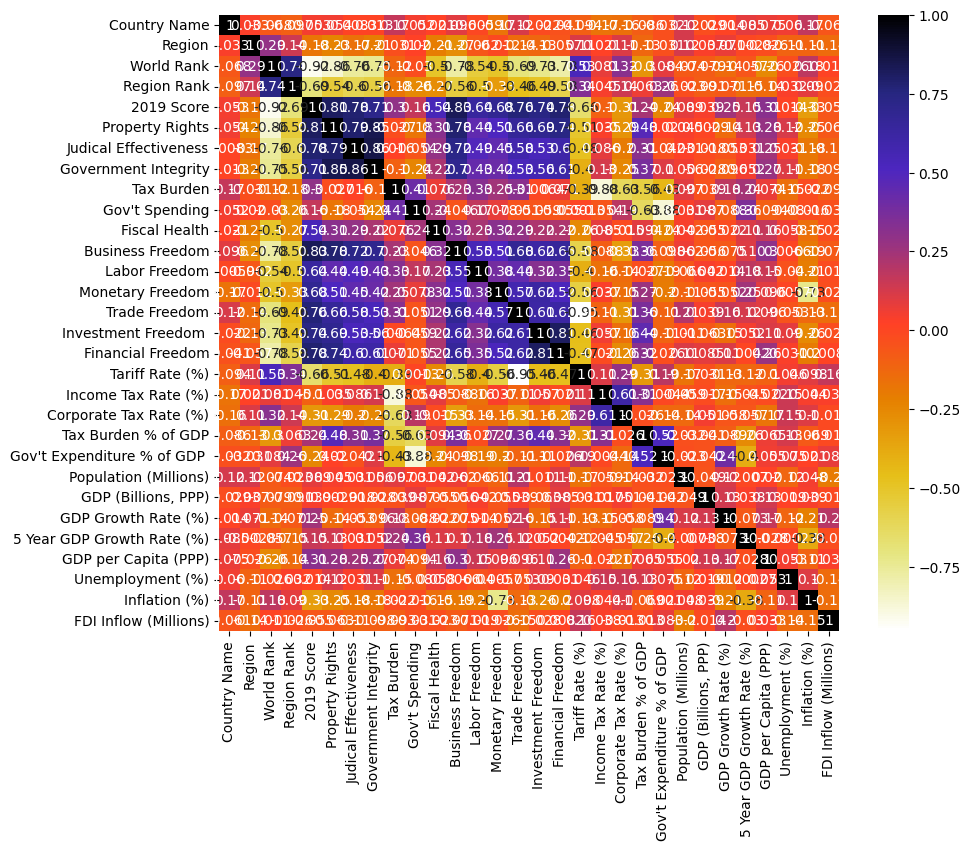

In [26]:
import seaborn as sns

# using the pearson correlation
plt.figure(figsize=(10,8))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

# now we will use a fucntion to find out highky correlated features from the matrix and comapre it  with threshold. if it exceddes threshold we will ignore the feature

In [27]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)

    return col_corr

In [32]:
correlated_features = correlation(X_train,0.85)

print(len(correlated_features))

6


In [33]:
correlated_features

{'2019 Score',
 "Gov't Expenditure % of GDP ",
 'Government Integrity',
 'Income Tax Rate (%)',
 'Property Rights',
 'Tariff Rate (%)'}

In [34]:
X_train.drop(correlated_features,axis=1)
X_test.drop(correlated_features,axis=1)

,Country Name,Region,World Rank,Region Rank,Judical Effectiveness,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,...,Corporate Tax Rate (%),Tax Burden % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions)
106,106,1,22.0,6.0,68.2,85.6,83.2,82.4,83.9,74.4,...,25.0,13.8,80,174,5.9,5.2,88,58,3.8,172
45,45,2,14.0,6.0,77.8,42.0,14.4,96.7,90.7,86.4,...,23.5,45.9,108,76,2.1,1.6,133,77,1.1,5
158,157,0,165.0,28.0,22.2,70.9,77.2,9.6,48.3,73.5,...,36.0,13.2,5,160,0.0,-0.9,41,96,22.0,11
63,63,2,24.0,14.0,75.4,60.8,42.3,91.8,83.3,52.8,...,15.8,37.6,132,111,2.5,1.7,144,62,1.7,107
135,135,2,62.0,30.0,64.3,59.9,35.6,69.8,79.7,44.3,...,23.0,34.4,18,92,2.7,1.2,103,101,1.6,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,138,2,98.0,41.0,45.1,89.4,62.3,86.6,78.4,52.5,...,20.0,22.2,36,110,1.5,0.3,86,74,3.7,83
152,151,1,133.0,33.0,51.7,65.5,36.5,89.4,68.6,72.0,...,30.0,30.8,5,17,3.2,2.9,63,39,-0.4,109
182,182,1,128.0,30.0,40.3,79.7,74.1,40.7,63.5,62.8,...,22.0,18.0,137,143,6.8,6.2,153,39,3.5,45
94,94,2,35.0,18.0,48.4,77.0,57.1,96.9,77.5,73.3,...,20.0,30.2,52,132,4.5,2.8,84,99,2.9,158
